In [1]:
from scipy.stats import entropy
from collections import Counter
import math
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import time

In [2]:
df=pd.read_csv('/content/loan_train.csv')
df=df.dropna(axis=0)
df.fillna(df.mean(),inplace=True)
df

<ipython-input-2-6777f4599945>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(),inplace=True)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df=df.replace('?',0) #replace null values with 0

df['ApplicantIncome']=df['ApplicantIncome'].astype(int) #converting to int from string in dataset all the numbers r stored as strings

df['CoapplicantIncome']=df['CoapplicantIncome'].astype(int)

x=df[['ApplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']].astype(float)
x
y=df['Loan_Status'].astype(str)

In [4]:
from sklearn.preprocessing import MinMaxScaler
sclar=MinMaxScaler()
x_small=sclar.fit_transform(x)
x_small

array([[0.05482993, 0.20135364, 0.72972973, 1.        ],
       [0.03525046, 0.0964467 , 0.72972973, 1.        ],
       [0.03009276, 0.18781726, 0.72972973, 1.        ],
       ...,
       [0.09798392, 0.41285956, 0.72972973, 1.        ],
       [0.09193568, 0.30118443, 0.72972973, 1.        ],
       [0.05482993, 0.20981387, 0.72972973, 0.        ]])

In [5]:
x=df[['ApplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']].astype(float)
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
s=x_train
h=y_train
model.fit(s,h)
model.predict(x_test)
y = x.iloc[:,-1].values


In [6]:
start=time.time()
model = DecisionTreeClassifier(max_depth=5) #max depth of tree should be 5
model = model.fit(x_train,y_train)
print('Tree Graph Classifier Score : ',model.score(x_train,y_train))
stop=time.time()
print('Time for Training:',stop-start)

Tree Graph Classifier Score :  0.8541666666666666
Time for Training: 0.021477699279785156


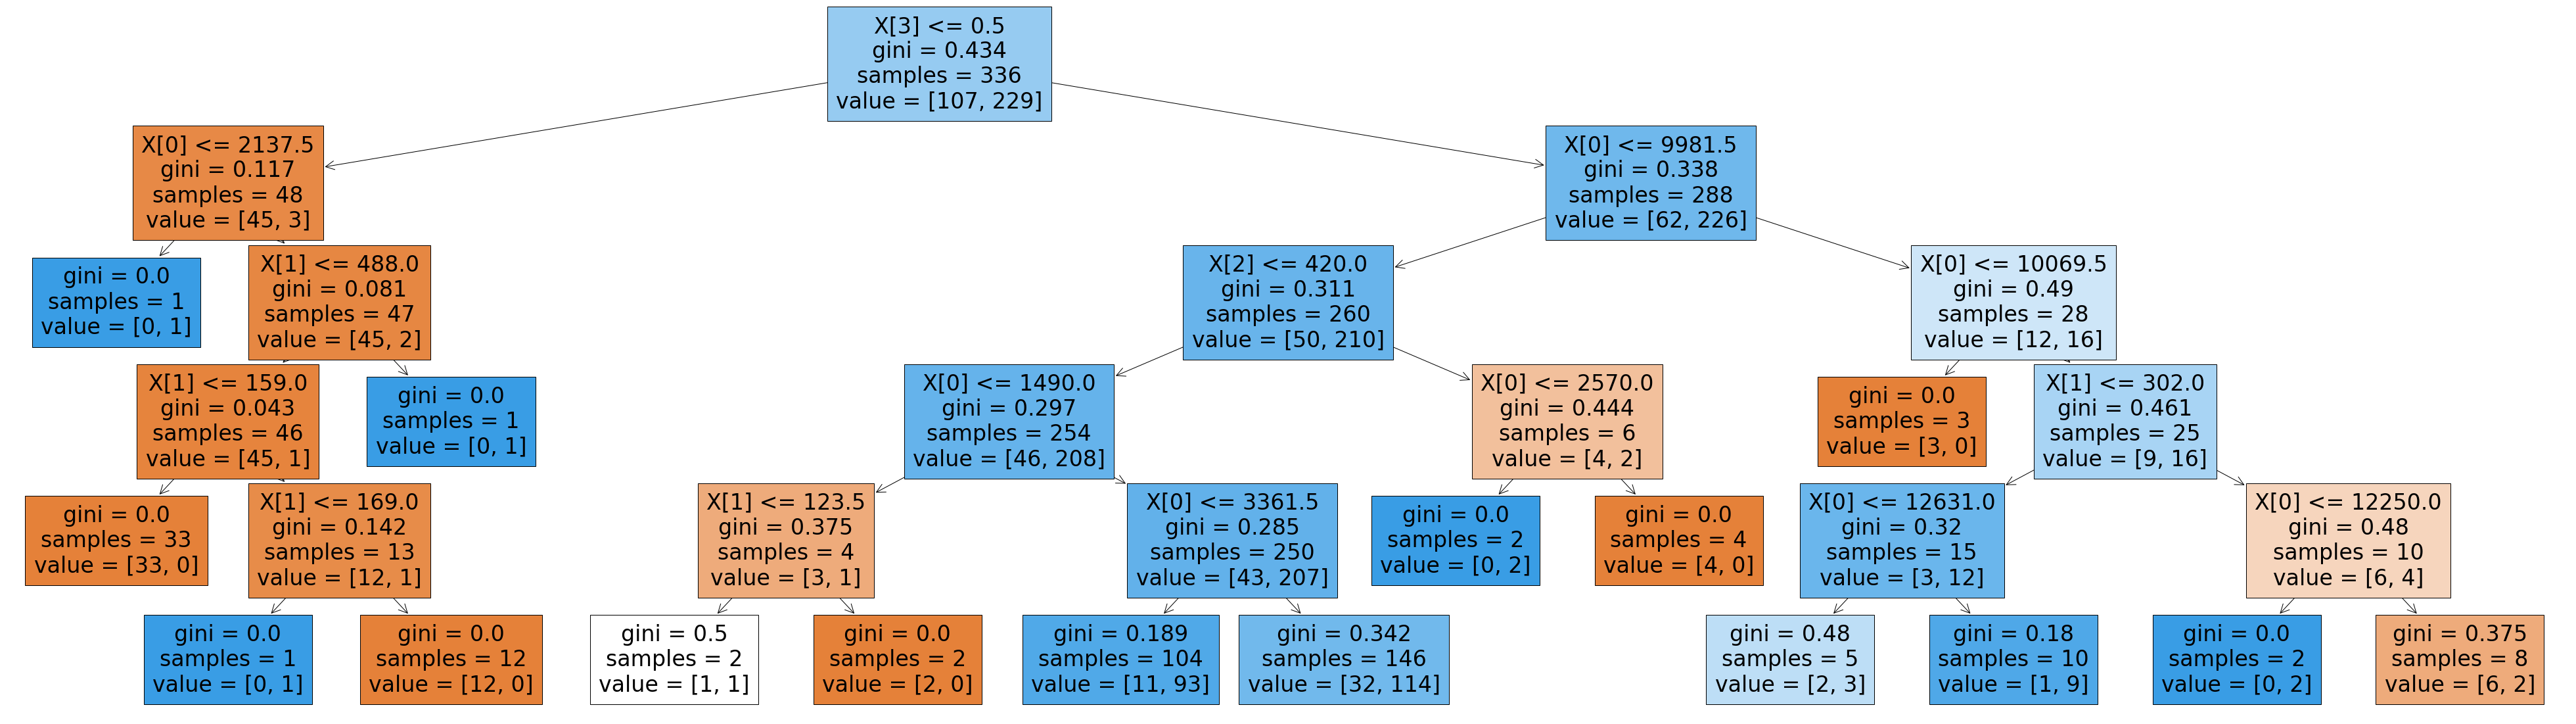

In [7]:
plt.figure(figsize=(70,20)) #fig length bredth
tree.plot_tree(model, filled=True) #plot tree is fn name to plot decision tree  all the values in the decision tree come from training data set given above
plt.show()

In [8]:
model = DecisionTreeClassifier(criterion="entropy") #saying that through entropy build tree
model = model.fit(x_train,y_train)
print('Tree Graph Classifier Score : ',model.score(x_train,y_train))

Tree Graph Classifier Score :  1.0


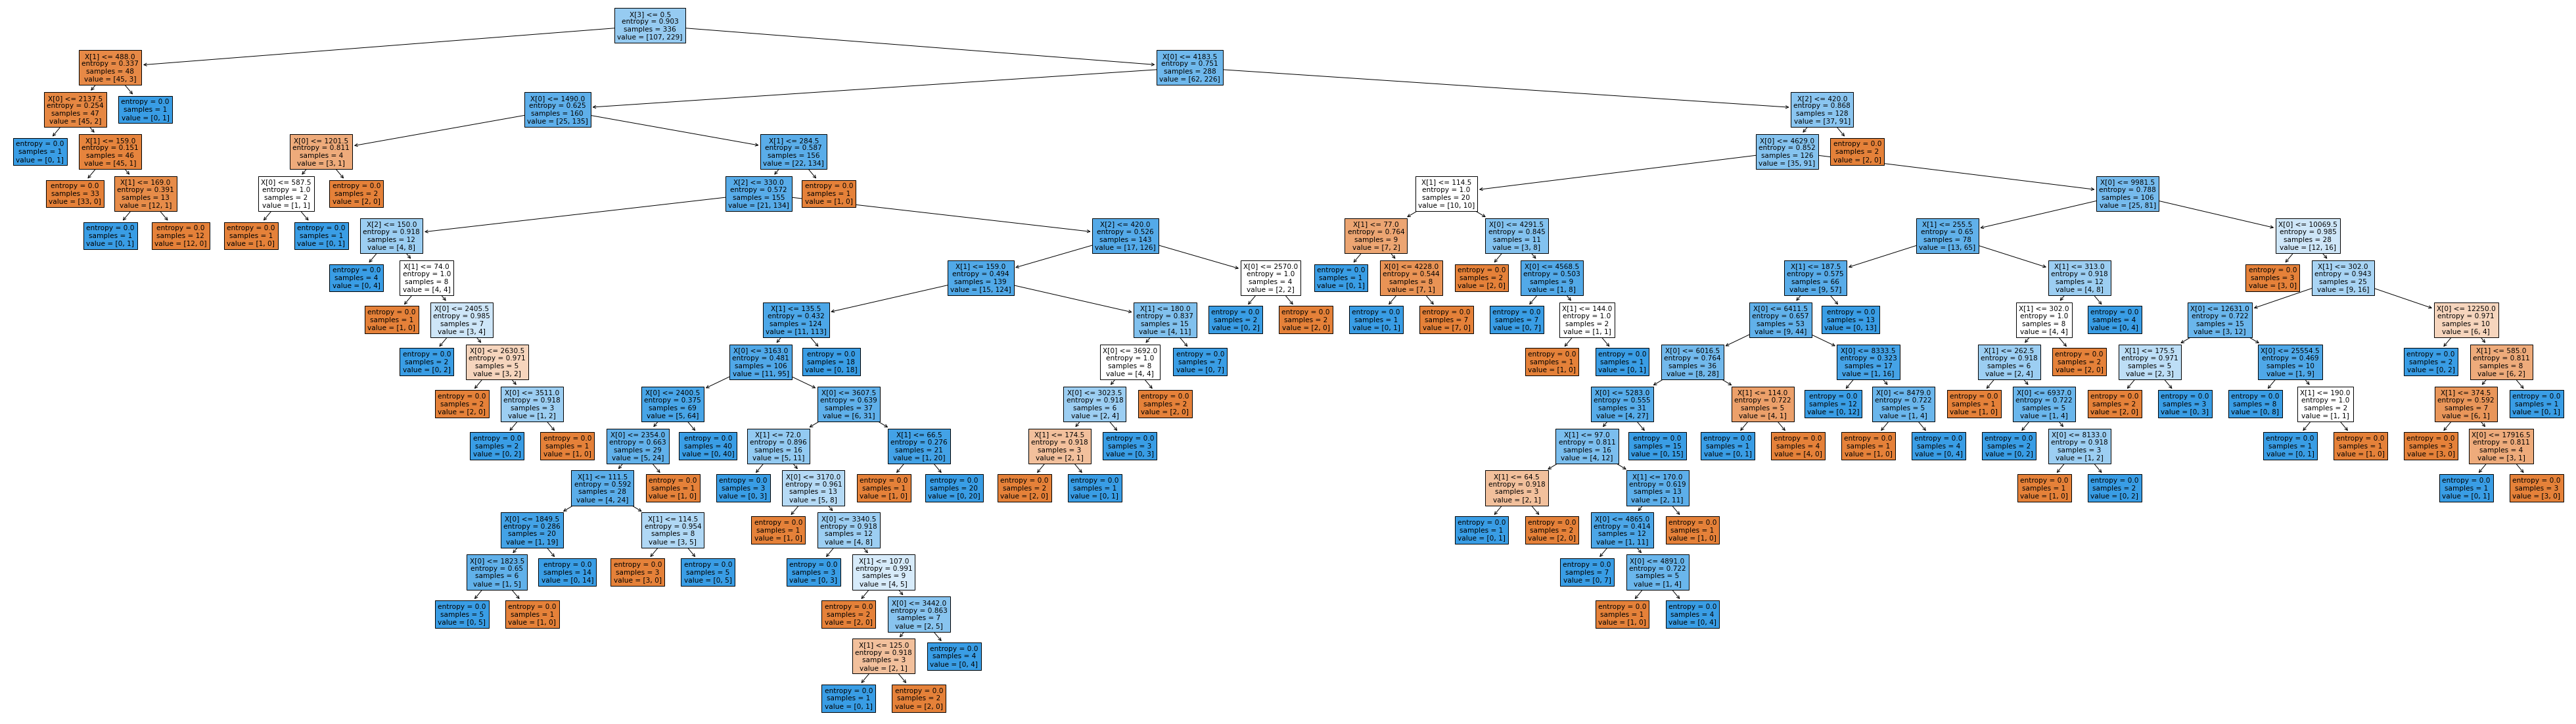

In [9]:
plt.figure(figsize=(70,20))
tree.plot_tree(model, filled=True)
plt.show()